In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
#from simulators.cosmic_shear.cosmic_shear import *
import ndes.nde as nde
import distributions.priors as priors

#Lyman-alpha forest modules & utilities
from compression import *
from likelihood import *
%config IPCompleter.greedy=True

%matplotlib inline

/share/apps/anaconda/python3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
/home/keir/Software/SimulationRunner/SimulationRunner/simulationics.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/share/apps/anaconda/python3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/share/apps/anaconda/python3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/share/

In [8]:
# Set-up for Lyman-alpha forest simulation code
root_dir = '/home/keir/Data/emulator'
training_dir = root_dir + '/hot_cold'
mock_data_dir = root_dir + '/hot_cold_test/HeliumHeatAmp0.95/output'
theta_fiducial = np.array([0., 0.95, 0.95]) #[dtau0, tau0, HeliumHeatAmp]
n_parameters = theta_fiducial.size

likelihood_instance = LikelihoodClass(training_dir, mock_data_dir, rescale_data_error=False)
emulator_object = likelihood_instance.gpemu
fixed_covariance = likelihood_instance.get_BOSS_covariance_full()
redshift_vector = likelihood_instance.zout

compression_instance = Compression(None, redshift_vector, fixed_covariance, emulator_object, parameter_vector=theta_fiducial)

#Prior (truncated Gaussian)
lower = likelihood_instance.param_limits[:, 0]
upper = likelihood_instance.param_limits[:, 1]
prior_sigma = np.array([0.1, 0.1, 0.1]) #Not uninformative

Q = np.eye(n_parameters) * (prior_sigma ** 2) #Prior covariance
prior_mean = theta_fiducial

#Asymptotic posterior approximation
Finv = compression_instance.get_inverse_Fisher_matrix(theta_fiducial)

#Parameter labelling
names = ['dtau0', 'tau0', 'HeliumHeatAmp']
labels = names
ranges = {names[0]:[lower[0], upper[0]], names[1]:[lower[1], upper[1]], names[2]:[lower[2], upper[2]]}

Found spectra in None
Found spectra in None
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d8d7e10>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d8d7d30>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d8ed1d0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d8ed2b0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d8ed710>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d8f5400>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d8f5358>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d8f5470>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d8f5be0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d9050f0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d9051d0>
Found spectra in None
Found spectra in None
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b661d905ef0>
Found spectra in <fake_spectra.spect

    00s07  0034  -6.556021e+03   4.512396e-05 
Runtime:     00s07
Optimization status: Converged


Name : GP regression
Objective : -6556.021129006545
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  sum.linear.variances     |      0.7878048108120019  |      +ve      |        
  sum.rbf.variance         |      15.340269616254309  |      +ve      |        
  sum.rbf.lengthscale      |       6.502223765407821  |      +ve      |        
  Gaussian_noise.variance  |  1.2493981135991306e-15  |      +ve      |        
  linear.    |  value  |  constraints  |  priors
  variances  |    1.0  |      +ve      |        
  sum.              |  value  |  constraints  |  priors
  linear.variances  |    1.0  |      +ve      |        
  rbf.variance      |    1.0  |      +ve      |        
  rbf.lengthscale   |    1.0  |      +ve      |        
Running L-BFGS-B (Scipy implementatio

    00s09  0038  -6.684542e+03   1.597784e-01 
    00s11  0046  -6.684561e+03   1.249645e-03 
    00s12  0051  -6.684562e+03   1.258920e-03 
Runtime:     00s12
Optimization status: Converged


Name : GP regression
Objective : -6684.5621070833095
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  sum.linear.variances     |  0.00042096198961691887  |      +ve      |        
  sum.rbf.variance         |      11.135722743995512  |      +ve      |        
  sum.rbf.lengthscale      |         6.6617867732109  |      +ve      |        
  Gaussian_noise.variance  |  4.2550708043438573e-14  |      +ve      |        
  linear.    |  value  |  constraints  |  priors
  variances  |    1.0  |      +ve      |        
  sum.              |  value  |  constraints  |  priors
  linear.variances  |    1.0  |      +ve      |        
  rbf.variance      |    1.0  |      +ve      |       

In [17]:
#Some test output
n_k = np.sqrt(fixed_covariance.size / (redshift_vector.size**2))
n_z = redshift_vector.shape[0]

print('Redshifts included in data vector =', redshift_vector)
print('Number of redshifts =', n_z)
print('Number of (line-of-sight) scale bins included in data vector =', n_k)

print("Fixed 'measurement' covariance matrix =", fixed_covariance)

print('Hard limits of prior (hyper-)volume =', lower, upper)

print('Inverse Fisher matrix (at fiducial parameter vector) =', Finv)

Redshifts included in data vector = [4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6 2.4 2.2]
Number of redshifts = 11
Number of (line-of-sight) scale bins included in data vector = 35.0
Fixed 'measurement' covariance matrix = [[4.24715088e+02 5.61421442e+00 5.75982273e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.61421442e+00 2.42336647e+02 4.43768571e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.75982273e+00 4.43768571e+00 2.65358363e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.24789754e+00
  1.40096016e-01 1.52573525e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.40096016e-01
  3.12493121e+00 1.88172539e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.52573525e-01
  1.88172539e-01 3.68063214e+00]]
Hard limits of prior (hyper-)volume = [-0.25  0.75  0.8 ] [0.25 1.25 1.2 ]
Inverse Fisher matrix (at fiducial parameter vector) = [[ 1.91741538e-06 -4.32801598e-07 -1.63378518e-07]
 [-4

In [9]:
# Define the simulator function: takes parameters, spits out simulated (compressed) summaries
simulator = lambda x: parameter_vector_to_compressed_data_vector_score_function(x, fiducial_parameter_vector, emulator_object, fixed_covariance)
#simulationABC(x, simABC_args)

In [10]:
# The data vector: import or otherwise simulate for testing
data_uncompressed = likelihood_instance.data_fluxpower #P(k_||, z) - decreasing z, then increasing k_|| for each z
#Might want to add BOSS noise realisation
data = data_vector_to_compressed_data_vector_score_function(data_uncompressed, theta_fiducial, emulator_object, fixed_covariance)
#projected_score(power_spectrum(theta_fiducial, sim_args), projection_args)


In [19]:
#Check data vector compression
#print('Uncompressed (mock) data vector =', data_uncompressed)
assert data_uncompressed.shape[0] == (n_k * n_z)
assert data.shape[0] == n_parameters

print('(Score function) compressed (mock) data vector =', data)
print('Fractional difference between compressed data vector and fiducial parameter vector =', (data-theta_fiducial)/theta_fiducial)

(Score function) compressed (mock) data vector = [2.23224355e-04 9.49975450e-01 9.50617438e-01]
Fractional difference between compressed data vector and fiducial parameter vector = [            inf -2.58424292e-05  6.49934278e-04]


In [20]:
# Create prior over parameters
prior = priors.TruncatedGaussian(prior_mean, Q, lower, upper)

# Create asymptotic posterior approximation
asymptotic_posterior = priors.TruncatedGaussian(theta_fiducial, Finv, lower, upper)

In [21]:
# Create the DELFI MDN object
n_components = 1

mdn = nde.DelfiMixtureDensityNetwork(simulator, prior, asymptotic_posterior, Finv, theta_fiducial, data, n_components, n_hidden = [50, 50], activations = ['tanh', 'tanh'], names = names, labels = labels, ranges = ranges)

Training on the pre-training data...
Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 18s 396us/step - loss: nan - val_loss: nan
Epoch 2/50
45000/45000 [==============================] - 18s 396us/step - loss: nan - val_loss: nan
Epoch 3/50
45000/45000 [==============================] - 18s 394us/step - loss: nan - val_loss: nan
Epoch 4/50
45000/45000 [==============================] - 18s 391us/step - loss: nan - val_loss: nan
Epoch 5/50
45000/45000 [==============================] - 18s 392us/step - loss: nan - val_loss: nan
Epoch 6/50
45000/45000 [==============================] - 18s 391us/step - loss: nan - val_loss: nan
Epoch 7/50
45000/45000 [==============================] - 18s 391us/step - loss: nan - val_loss: nan
Epoch 8/50
45000/45000 [==============================] - 18s 392us/step - loss: nan - val_loss: nan
Epoch 9/50
45000/45000 [==============================] - 18s 391us/step - loss: nan - val_loss: nan
Epoch

Done.


DensitiesError: Contour level outside plotted ranges

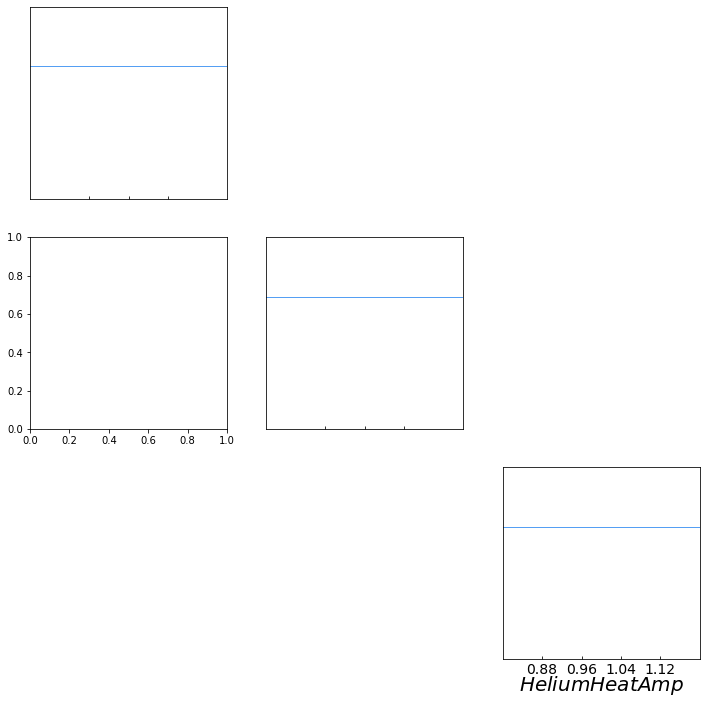

In [22]:
# Proposal for the Fisher pre-training stage
proposal = priors.TruncatedGaussian(prior_mean, Q, lower, upper)

# Do the Fisher pre-training
mdn.fisher_pretraining(50000, proposal, epochs=50)

In [ ]:
# Proposal for the SNL
proposal = priors.TruncatedGaussian(theta_fiducial, 9*Finv, lower, upper)

# Initial samples, batch size for population samples, number of populations
n_initial = 500
n_batch = 500
n_populations = 8

# Do the SNL training
mdn.sequential_training(n_initial, n_batch, n_populations, proposal)

In [ ]:
# Trace plot of the loss as a function of the number of simulations
plt.scatter(mdn.n_sim_trace, mdn.loss_trace, s = 20)
plt.plot(mdn.n_sim_trace, mdn.loss_trace, color = 'red')
plt.xlim(0, mdn.n_sim_trace[-1])
plt.xlabel('number of simulations')
plt.ylabel('loss')
plt.show()